# Problem Statement:
AllLife Credit Card Customer Segmentation

Background: 

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.
 
Objective: 

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

Key Questions:

How many different segments of customers are there?
How are these segments different from each other?
What are your recommendations to the bank on how to better market to and service these customers?
 

Data Description: 

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

- Customer key - Identifier for the customer 
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [9]:
df = pd.read_excel("Credit_Card_Customer_Data.xlsx")
df.drop(columns = {'Sl_No'}, inplace=True)
df.head(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3
5,58634,20000,3,0,1,8
6,48370,100000,5,0,11,2
7,37376,15000,3,0,1,1
8,82490,5000,2,0,2,2
9,44770,3000,4,0,1,7


### EDA

In [10]:
df.shape

(660, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [12]:
df.dtypes

Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [13]:
df.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [14]:
# Check for missing value in any other column
df.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [15]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


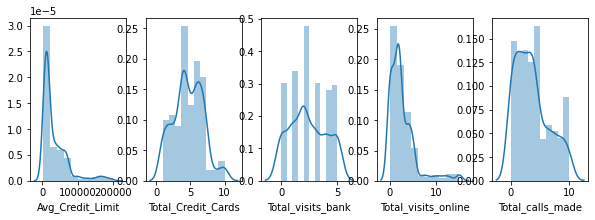

In [16]:
f, ax = plt.subplots(1, 5, figsize=(10,3))
vis1 = sns.distplot(df["Avg_Credit_Limit"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["Total_Credit_Cards"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["Total_visits_bank"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["Total_visits_online"],bins=10, ax=ax[3])
vis5 = sns.distplot(df["Total_calls_made"],bins=10, ax=ax[4])
f.savefig('subplot.png')

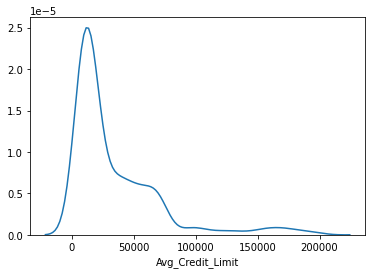

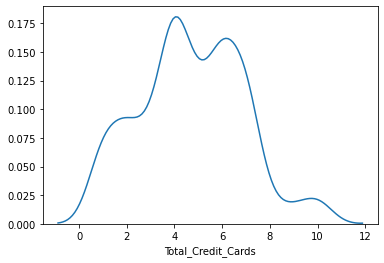

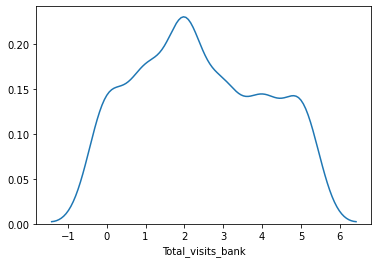

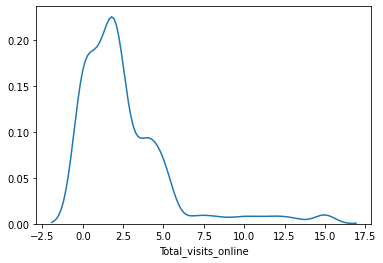

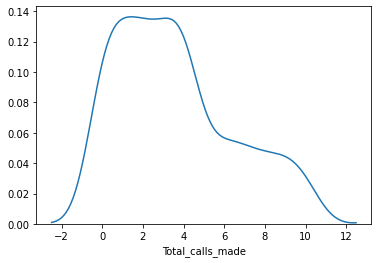

In [17]:
import seaborn as sns

for i in df.columns[df.columns!='Customer Key']:
    sns.distplot(df[i],hist=False,)
    plt.show()

In [18]:
# Check for correlation of variable
df.corr(method='pearson')

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


In [19]:
# Total credit cards shows high significance with average credit limit. 
# Total calls made shows a high negative correlation with total credit cards.

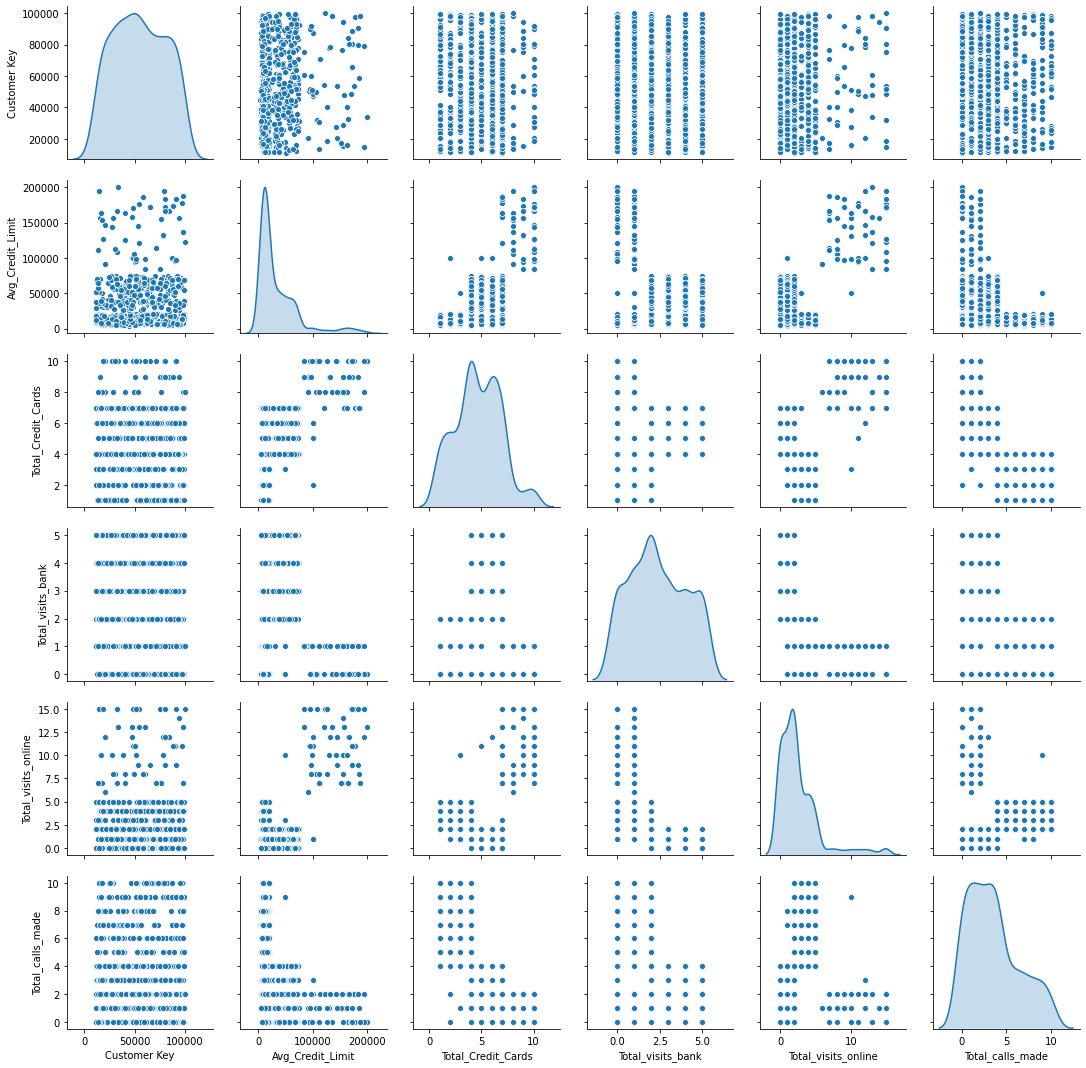

In [20]:
sns.pairplot(df,diag_kind='kde')

In [21]:
# Pairplot shows some correlation. 
# Distribution of variables shows more values on low to mid side 

### K-Means

In [25]:
##Scale the data
from scipy.stats import zscore

df_z = df.apply(zscore)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

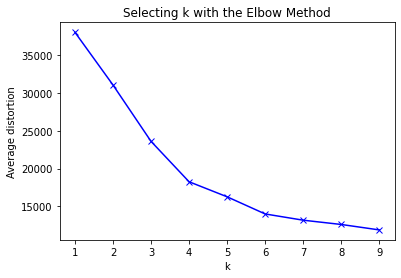

In [24]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    prediction=model.predict(df)
    meanDistortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [27]:
#Set the value of k=6
kmeans = KMeans(n_clusters=6, n_init = 15, random_state=2345)

In [28]:
kmeans.fit(df_z)

KMeans(n_clusters=6, n_init=15, random_state=2345)

In [29]:
centroids = kmeans.cluster_centers_

In [30]:
centroids

array([[-0.86290699, -0.59443661, -0.96641851, -0.92675118,  0.37383412,
         1.17130053],
       [ 0.99833707,  0.08438427,  0.41034042,  0.72320949, -0.55827735,
        -0.58395253],
       [ 0.06120332,  2.83176409,  1.86222621, -1.10576269,  2.82731942,
        -0.87432983],
       [ 0.87788748, -0.59874978, -1.16188754, -0.87702577,  0.28170173,
         1.15242127],
       [-0.66190489, -0.02038043,  0.35358796,  0.03248526, -0.55021681,
        -0.51388706],
       [-0.75925854, -0.18980643,  0.32474648,  1.30647255, -0.54424313,
        -0.54967854]])

In [31]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )

In [32]:
print(centroid_df)

   Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0     -0.862907         -0.594437           -0.966419          -0.926751   
1      0.998337          0.084384            0.410340           0.723209   
2      0.061203          2.831764            1.862226          -1.105763   
3      0.877887         -0.598750           -1.161888          -0.877026   
4     -0.661905         -0.020380            0.353588           0.032485   
5     -0.759259         -0.189806            0.324746           1.306473   

   Total_visits_online  Total_calls_made  
0             0.373834          1.171301  
1            -0.558277         -0.583953  
2             2.827319         -0.874330  
3             0.281702          1.152421  
4            -0.550217         -0.513887  
5            -0.544243         -0.549679  


In [33]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [34]:
# Joining the label dataframe with the data frame.
df_labeled = df.join(df_labels)

In [35]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,87073,100000,2,1,1,0,1
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,4
3,40496,30000,5,1,1,4,4
4,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...
655,51108,99000,10,1,10,0,2
656,60732,84000,10,1,13,2,2
657,53834,145000,8,1,9,1,2
658,80655,172000,10,1,15,0,2


In [36]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,87073,100000,2,1,1,0,1
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,4
3,40496,30000,5,1,1,4,4
4,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...
655,51108,99000,10,1,10,0,2
656,60732,84000,10,1,13,2,2
657,53834,145000,8,1,9,1,2
658,80655,172000,10,1,15,0,2


In [37]:
df_labeled['labels'].value_counts()  

1    158
4    125
3    111
0    111
5    105
2     50
Name: labels, dtype: int64

In [42]:
final_model=KMeans(6)
final_model.fit(df)
prediction=final_model.predict(df)

#Append the prediction 
df["GROUP"] = prediction
print("Groups Assigned : \n")
df[["Total_Credit_Cards", "GROUP"]]

Groups Assigned : 



,Total_Credit_Cards,GROUP
0,2,4
1,3,1
2,7,1
3,5,5
4,6,1
...,...,...
655,10,1
656,10,1
657,8,2
658,10,2


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Customer Key'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

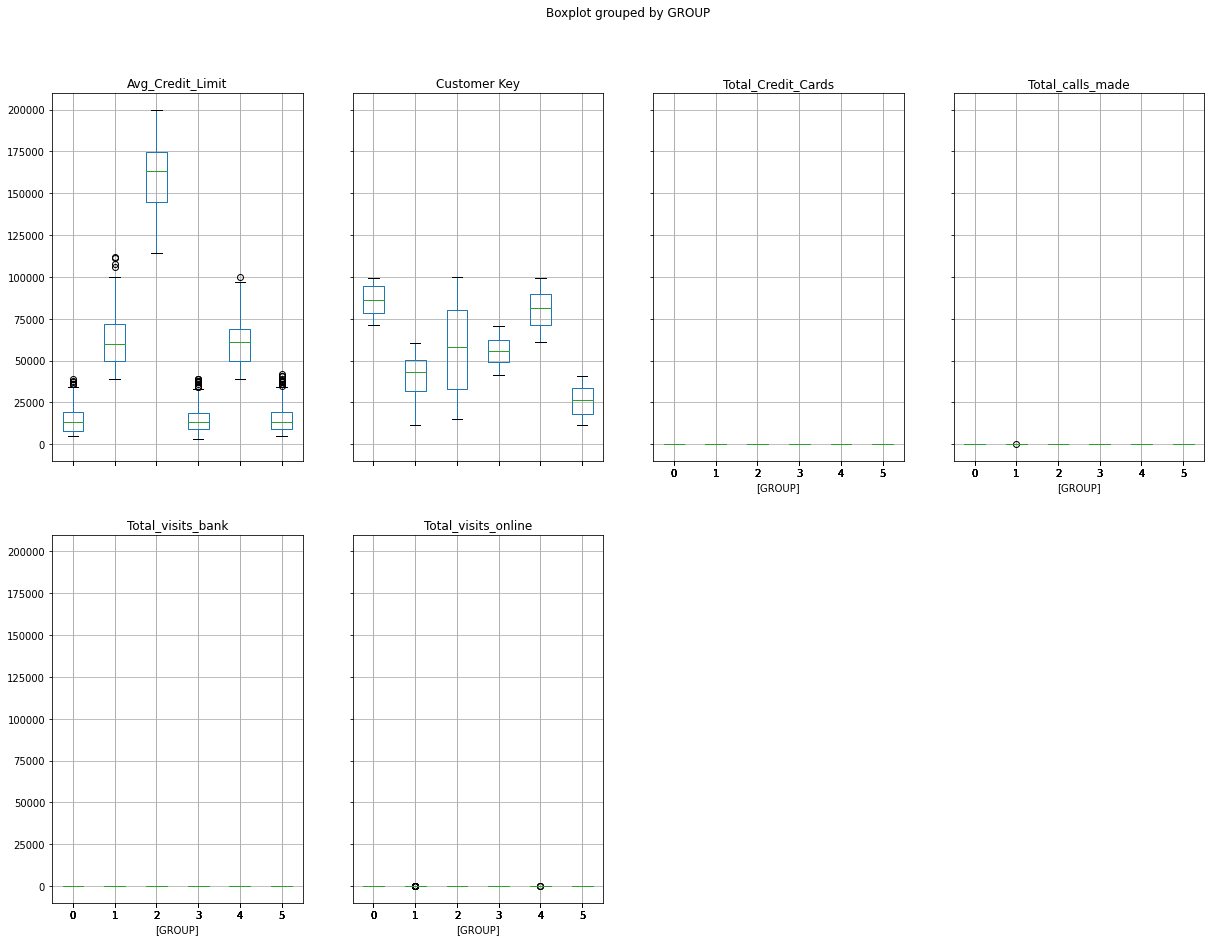

In [43]:
df.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

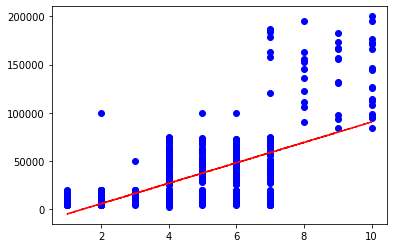

In [51]:
%matplotlib inline
import pandas as pd
plt.plot(df['Total_Credit_Cards'], df['Avg_Credit_Limit'], 'bo')
z = np.polyfit(df['Total_Credit_Cards'], df['Avg_Credit_Limit'],1)
p = np.poly1d(z)
plt.plot(df['Total_Credit_Cards'], p(df['Total_Credit_Cards']), "r--")

#geom_point()

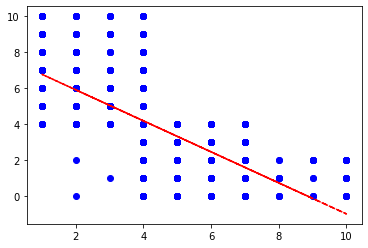

In [53]:
%matplotlib inline
import pandas as pd
plt.plot(df['Total_Credit_Cards'], df['Total_calls_made'], 'bo')
z = np.polyfit(df['Total_Credit_Cards'], df['Total_calls_made'],1)
p = np.poly1d(z)
plt.plot(df['Total_Credit_Cards'], p(df['Total_Credit_Cards']), "r--")

#geom_point()

In [55]:
# We can conclude, again, a positive relationship between total credit cards and average credit limit, and 
# a negative relationship between total credit cards and total calls made.

Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot.

Calculate average silhouette score for both methods.

Compare K-means clusters with Hierarchical clusters.

Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions.